In [27]:
import pandas as pd 
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import re


In [138]:
del df

In [2]:
df=pd.read_excel('incident titre.xlsx')

In [140]:
df.columns

Index(['Titre '], dtype='object')

In [3]:
stop_words=stopwords.words('french')
punctuation=re.compile(r'[-!?,.;/:()|0-9]')

post_ponctuation=[]
for words in list(df['Titre ']):
    word=punctuation.sub("",words)
    if len(word)>0:
        post_ponctuation.append(word)

In [ ]:
post_ponctuation

In [ ]:
doc

In [6]:
doc=[]
for word in post_ponctuation :
    word_tokens = word_tokenize(word)
    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    doc.append(filtered_sentence)

    
   
                   

In [11]:
doc=str(doc)

In [ ]:
doc

In [15]:

ch=""
for word in doc :
    if "[" ==word or ","==word or "'"==word  :
        continue
    else:
        ch=ch+word

In [16]:
doc=ch.split(']')

In [ ]:
doc

In [18]:
vectorizer_wtf = TfidfVectorizer(analyzer='word')
X_wtf = vectorizer_wtf.fit_transform(doc)

In [19]:
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(doc)

In [20]:
k=20
model=KMeans(n_clusters=k,init='k-means++',max_iter=100,n_init=1)
model.fit(X_wtf)

KMeans(max_iter=100, n_clusters=20, n_init=1)

In [21]:
df['cluster']=model.labels_

ValueError: Length of values (974) does not match length of index (972)

In [22]:
df

,Titre
0,problème de syncronisation
1,problème de syncronisation
2,Réclamation NAV
3,Réclamation NAV
4,Tableaux croisés dynamiques
...,...
967,Vérification Plafond CEA PDG selon Loi de Fina...
968,vérification recette shop
969,vérification recette shop
970,Vérification SF Achat/PL


In [23]:
print("cluster centroids :\n")
order=model.cluster_centers_.argsort()[:,::-1]
terms=vectorizer_cv.get_feature_names()
for i in range (k):
    print("cluster %d: "%i)
    for j in order[i, :10]:
        print('%s'%terms[j])
        print('-----------------------')


cluster centroids :

cluster 0: 
noir
-----------------------
ecran
-----------------------
écran
-----------------------
bleu
-----------------------
noire
-----------------------
re
-----------------------
fermeture
-----------------------
etat
-----------------------
etats
-----------------------
ettayarane
-----------------------
cluster 1: 
non
-----------------------
remontées
-----------------------
transactions
-----------------------
vérification
-----------------------
remontée
-----------------------
verification
-----------------------
re
-----------------------
remontees
-----------------------
remontés
-----------------------
remontes
-----------------------
cluster 2: 
re
-----------------------
bloqué
-----------------------
compte
-----------------------
transfert
-----------------------
crm
-----------------------
articles
-----------------------
article
-----------------------
dynamics
-----------------------
données
-----------------------
manquantes
---------------

In [25]:
%matplotlib inline
import plotly.express as px
#Libraries for preprocessing
from gensim.parsing.preprocessing import remove_stopwords
import string
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import webcolors

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
from fuzzywuzzy import fuzz

#Libraries for clustering
from sklearn.cluster import KMeans

C:\Users\skand\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


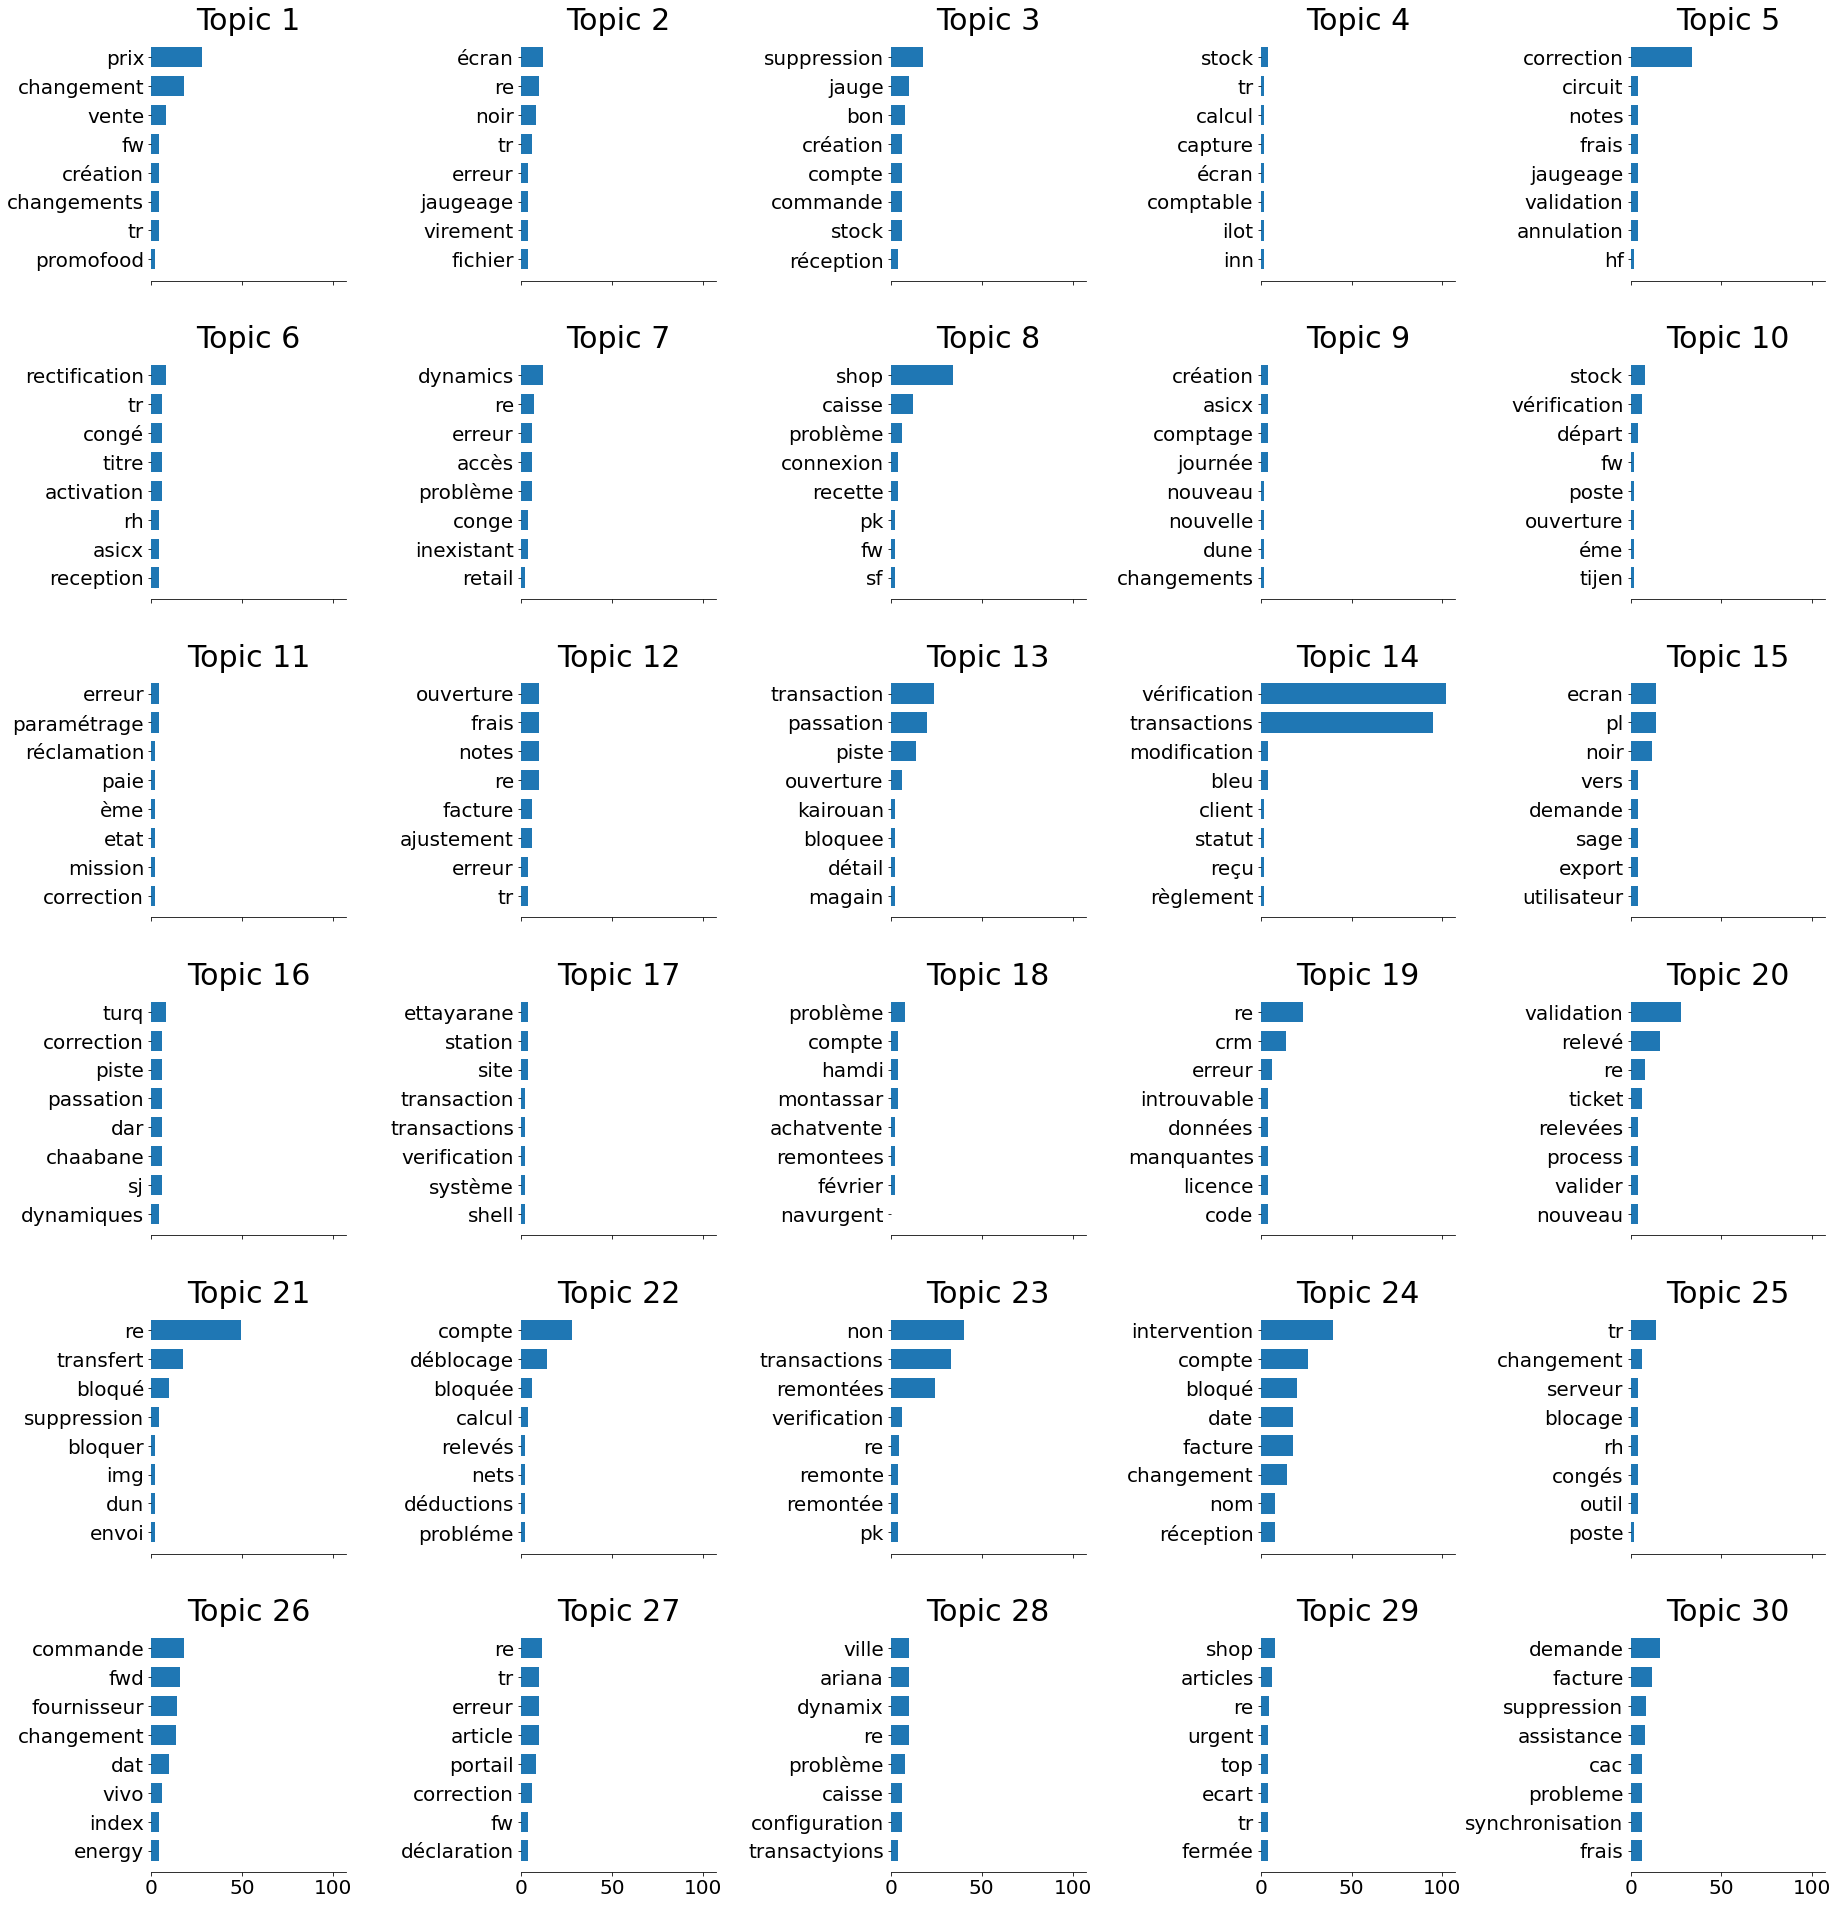

In [28]:
#LDA
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_cv)

#Plot topics function. Code from: https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 8
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')